# Exercise sheet 4
**Hello everyone!**

**Points: 15**

Topics of this exercise sheet are:
* Working with seaborn
* Data visualization principles

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [ADAM](https://adam.unibas.ch/goto_adam_crs_1266890.html), [Piazza](https://piazza.com/class/kzy15kp8s5t6ku), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids22).

Please submit this exercise sheet on **ADAM**.
Naming conventions:
* Name of notebook: "Exercise sheet 4.ipynb"
* Please put it in a folder structure like this: "your_unibas_short_name/Exercise4/Exercise sheet 4.ipynb"
* You can find your unibas short name either...
    * by looking at the filename of the feedback on exercise sheet 2 (from ADAM)
    * or if you didn't submit exercise sheet 2, log in to viaweb.unibas.ch and you will see your unibas short name after the welcome message
* Then zip this folder and upload it on ADAM.

**Handout date**: 2022/03/28 <br>
**Submission date**: 2022/04/04 <br>
**Discussion date**: 2022/04/05

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

## 1 (5 points)

### 1a (1 point)
We will use data from [Kaggle](https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021) about different cities around the world.

In [20]:
cities = pd.read_csv("healthy_lifestyle_city_2021.csv")
cities.head()


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


First, let's clean this data a little.
* Replace the values in "Cost of a bottle of water(City)", "Sunshine hours(City)" and "Cost of a monthly gym membership(City)" with numerical values (hint: use the pandas functions .str and .as_type())
* Replace the values in "Obesity levels(Country)" to be numerical values. A value "20.40%" should be converted to "0.204".

In [21]:
# YOUR CODE HERE
cities = cities.replace("-", None)
cities["Cost of a bottle of water(City)"] = cities["Cost of a bottle of water(City)"].str[1:]
cities["Cost of a monthly gym membership(City)"] = cities["Cost of a monthly gym membership(City)"].str[1:]
cities.loc[:,["Cost of a bottle of water(City)","Cost of a monthly gym membership(City)", "Sunshine hours(City)"]] =cities.loc[:,["Cost of a bottle of water(City)","Cost of a monthly gym membership(City)", "Sunshine hours(City)"]].astype(float)
cities["Obesity levels(Country)"] = cities["Obesity levels(Country)"].str[:-1].astype(float) /100 
#raise NotImplementedError()

In [22]:
assert_is_instance(cities, pd.DataFrame)
assert_equal(len(cities), 44)
assert_almost_equal(cities.loc[(cities["City"] == "Vienna")]["Sunshine hours(City)"].values[0], 1884.0)
assert_almost_equal(cities.loc[(cities["City"] == "Stockholm")]["Cost of a bottle of water(City)"].values[0], 1.72)
assert_almost_equal(cities.loc[(cities["City"] == "Milan")]["Obesity levels(Country)"].values[0], 0.199)
assert_almost_equal(cities.loc[(cities["City"] == "New York")]["Cost of a monthly gym membership(City)"].values[0], 64.66)

### 1b (1 point)
What is the mean of the column "Obesity levels(Country)"?

In [23]:
mean_obesity_level = cities["Obesity levels(Country)"].mean()

# YOUR CODE HERE
#raise NotImplementedError()

### 1c (1 point)
Is the mean a good measure to summarize the values of "Obesity levels(Country)"?

<AxesSubplot:ylabel='Obesity levels(Country)'>

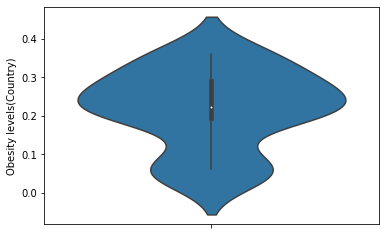

In [30]:
# a visualization might help...
sns.violinplot(y=cities["Obesity levels(Country)"])
# YOUR CODE HERE
#raise NotImplementedError()

The mean doesn't show us the distribution. With a violinplot we can see an (approximated) distribution, and we see 2 different groups of country with 0.25 obesity and under 0.1 obesity respectively

### 1d (2 points)
Please make a new column called "Continent" containing the continent of each city. <br>
If a city is in multiple continents, choose one (it will make the following plots cleaner). <br>
Use this list of continent names: Europe, Australia, America, Asia, Antarctica, Oceania.

Hint: You can go two routes, find a different dataframe on the internet to join to this one (using the pandas function merge), or hand-code the information. Whichever is easier for you :)

In [37]:
continents = {"Europe":["Amsterdam", "Vienna", "Stockholm", "Copenhagen", "Helsinki", "Berlin", "Barcelona", "Madrid", "Frankfurt", "Istanbul", "Geneva", "Dublin", "Moscow", "Brussels", "Paris", "Zurich", "London", "Milan"],
              "Asia" : ["Fukuoka", "Beijing", "Bangkok", "Jakarta", "Seoul", "Taipei", "Tel Aviv", "Mumbai", "Tokyo", "Shanghai", "Hong Kong"],
              "America":["Vancouver", "Buenos Aires", "Toronto", "Los Angeles", "Boston", "Chicago", "San Francisco", "Sao Paulo", "Washington, D.C.", "New York", "Mexico City"],
              "Africa" :["Cairo", "Johannesburg"],
              "Australia":["Sydney", "Melbourne"]}

for continent in continents:
    cities.loc[cities.City.isin(continents[continent]), "Continent"] = continent

# YOUR CODE HERE
#raise NotImplementedError()

In [39]:
assert_equal(cities.loc[(cities["City"] == "Vienna")]["Continent"].values[0], "Europe")
assert_equal(cities.loc[(cities["City"] == "Sydney")]["Continent"].values[0], "Australia")
assert_equal(cities.loc[(cities["City"] == "Johannesburg")]["Continent"].values[0], "Africa")
assert_equal(cities.loc[(cities["City"] == "Sao Paulo")]["Continent"].values[0], "America")
assert_equal(cities.loc[(cities["City"] == "Shanghai")]["Continent"].values[0], "Asia")

What does the column "Continent" have to do with question 1c? (Hint: This is pretty similar to the penguin flipper lengths from the lecture)

<AxesSubplot:xlabel='Continent', ylabel='Obesity levels(Country)'>

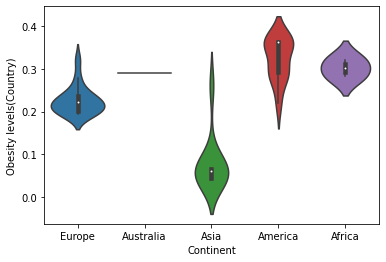

In [40]:
sns.violinplot(x=cities["Continent"], y=cities["Obesity levels(Country)"])

# YOUR CODE HERE
#raise NotImplementedError()

We can see that the Asian countries in our data set have a lower obesity level than other continents. It is important to note that Australia and Africa only have to cities in the data set

![](https://upload.wikimedia.org/wikipedia/commons/8/89/Melbourne_skyline_from_Williamstown.png)

## 2 (8 points)
You have gotten the job as data visualization expert in Melbourne. 🎉 Congratulations! <br>
Your first task is to make a stunning plot to convince everyone that Melbourne is the best city in the whole wide world! We want to print it on posters! Or at least in the national tourism brochure.

* Make **one plot** using any and all (evil) principles of data visualization. If you need inspiration, look at the examples on the lecture slides or here: https://www.youtube.com/watch?v=E91bGT9BjYk or google "misleading data visualization".
* If necessary, write (max) 3 sentences to explain your plot

In [51]:
cities.loc[:,["Pollution(Index score) (City)", "Annual avg. hours worked"]] = cities.loc[:,["Pollution(Index score) (City)", "Annual avg. hours worked"]].astype(float)

In [83]:
cities_mean = pd.concat([cities.loc[cities["City"] == "Melbourne"].groupby("City").mean(), cities.groupby("Continent").mean()])


<AxesSubplot:>

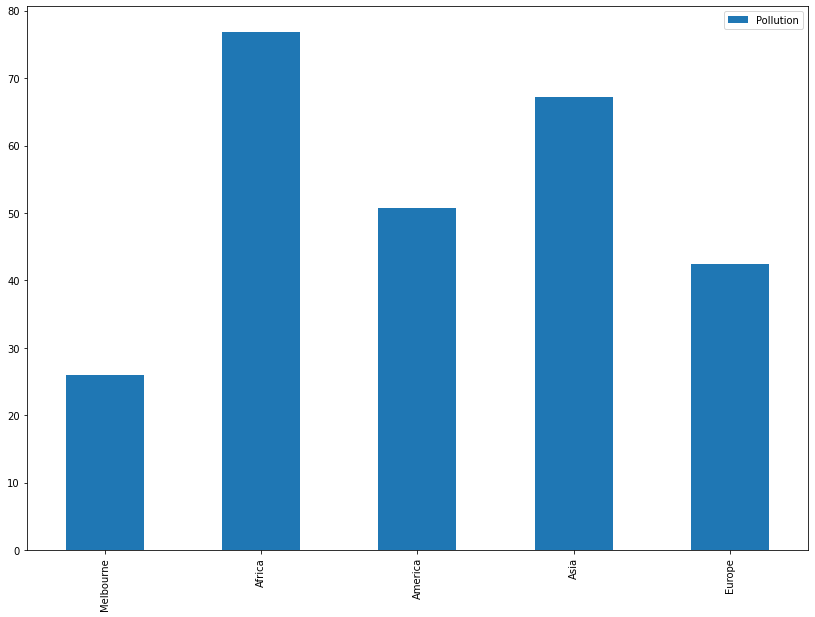

In [82]:
# Put your plot here

cities_mean.loc[cities_mean.index != "Australia",["Pollution(Index score) (City)"]].rename(columns={"Pollution(Index score) (City)":"Pollution"}).plot.bar(figsize=(14,10))
#raise NotImplementedError()

Melbourne as a clean city compared to the cities of other continents


## 3 (2 points)
### 3a (2 points)
Where did this data even come from? Find one instance where a data point in the cities dataframe is false. Write one sentence explaining why it is false and provide a source proving your claim.

Life expectancy in Spain is 83.3 years according to a study by the ministry of health in 2018